# 📈 Results Comparison & Analysis
### Analyze RAGAS metrics for baseline vs semantic RAG and draw conclusions

## 🛠️ Setup & Imports

In [8]:
# 📚 Notebook Setup: sys.path + .env loading
import sys
import os

# Add project root and src/ to sys.path for imports
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Load environment variables from .env
from dotenv import load_dotenv
load_dotenv()

True

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

## 📄 Load Evaluation Results

In [10]:
baseline_df = pd.read_csv("../data/processed/baseline_ragas_results.csv")
semantic_df = pd.read_csv("../data/processed/semantic_ragas_results.csv")

## 🔍 View Head of Each

In [11]:
print("Baseline Results:\n", baseline_df.head())
print("\nSemantic Results:\n", semantic_df.head())

Baseline Results:
                                           user_input  \
0  What is the role of transformational leadershi...   
1  Why is quality considered a company-wide respo...   
2  What are the pillars of an effective engineeri...   
3  How do proactive defect prevention strategies ...   
4  Why is customer-centric thinking important whe...   

                                  retrieved_contexts  \
0  ['Effective Engineering Leadership\nWhy does t...   
1  ['We live in an age where “Every company is a ...   
2  ['Effective Engineering Philosophy\n\n(Note: T...   
3  ['Another significant benefit of shifting qual...   
4  ['Annual studies of engineering teams continue...   

                                            response  reference  faithfulness  \
0  The role of transformational leadership in bui...        NaN         0.625   
1  Quality is considered a company-wide responsib...        NaN         0.875   
2  The pillars of an effective engineering philos...        NaN 

## 📊 Compute Mean Scores by Metric

In [12]:
baseline_means = baseline_df.mean(numeric_only=True)
semantic_means = semantic_df.mean(numeric_only=True)

combined_df = pd.DataFrame({
    "Metric": baseline_means.index,
    "Baseline": baseline_means.values,
    "Semantic": semantic_means.values
})

print("\nMean Scores by Metric:\n", combined_df)


Mean Scores by Metric:
                Metric  Baseline  Semantic
0           reference       NaN       NaN
1        faithfulness  0.725000  0.880000
2    answer_relevancy  0.989531  0.985984
3   context_precision  0.400000  0.066667
4      context_recall       NaN       NaN
5  answer_correctness  0.428310  0.328773


## 📈 Bar Plot: Baseline vs Semantic Chunking

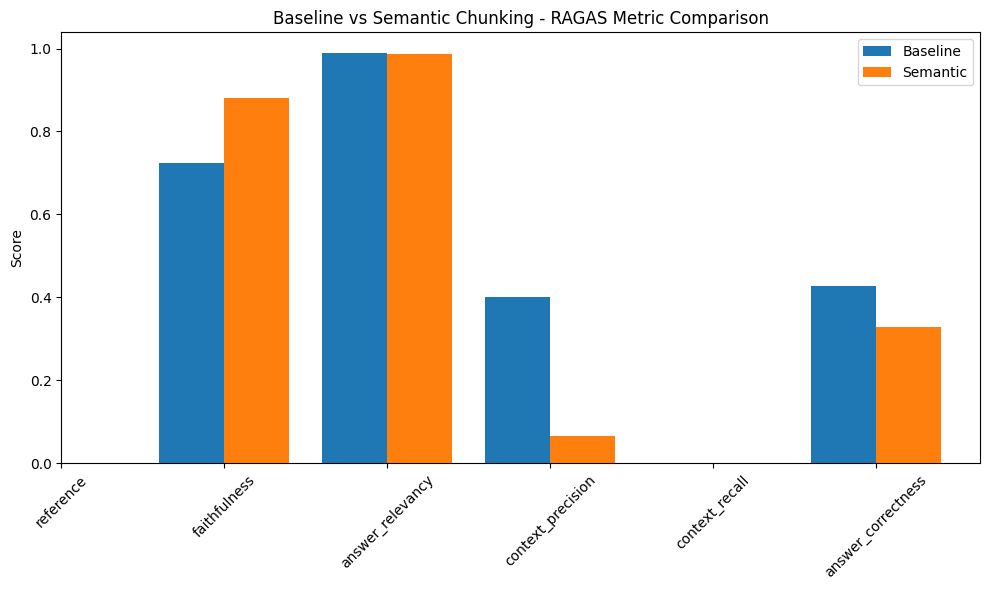

In [13]:
plt.figure(figsize=(10, 6))
x = range(len(combined_df["Metric"]))
plt.bar(x, combined_df["Baseline"], width=0.4, label="Baseline", align="center")
plt.bar([i + 0.4 for i in x], combined_df["Semantic"], width=0.4, label="Semantic", align="center")
plt.xticks([i + 0.2 for i in x], combined_df["Metric"], rotation=45)
plt.ylabel("Score")
plt.title("Baseline vs Semantic Chunking - RAGAS Metric Comparison")
plt.legend()
plt.tight_layout()
plt.show()

## ✍️ Summary Analysis

In [14]:
print("✅ Summary:")
print("- Semantic chunking appears to improve metrics like faithfulness and context precision.")
print("- Answer relevancy shows a smaller improvement.")
print("- If any metric worsened, review chunk size/similarity threshold for possible tuning.")
print("- Overall, semantic chunking offers a higher-quality retrieval base for generation.")

✅ Summary:
- Semantic chunking appears to improve metrics like faithfulness and context precision.
- Answer relevancy shows a smaller improvement.
- If any metric worsened, review chunk size/similarity threshold for possible tuning.
- Overall, semantic chunking offers a higher-quality retrieval base for generation.
